## 有無快送 

In [1]:
# coding: utf-8

import pandas as pd
import os
import matplotlib.pyplot as plt
yowoo = pd.read_csv("C:\\Users\\Tsai Jessica\\NTU\\CSX4001_DataScience_Spring2019\\final\\1a.csv", low_memory=False, encoding = 'utf-8')
yowoo.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Review Body,Developer Reply,Review Likes
0,1,蘇于葶,2019年6月3日,4,在家叫外送好輕鬆～快輸入我的優惠碼96077188就可獲得《有無快送》首購折抵NT$100優惠券,NaN,0
1,2,S Lin,2019年5月25日,5,新朋友請輸入推薦優惠碼：04574846，可以獲得折扣優惠喔；美食店家、外送服務…，現在運...,NaN,17
2,3,張玉琳,2019年6月1日,1,新店市區不在服務範圍內……可惜~本想換別家試試，程式中的貨到付款的交易，方便無信用卡的人使...,NaN,0
3,4,Vivian yang,2019年6月3日,3,不錯用，外送很快。但地址搜尋有問題，打松山區地圖確一直跑出松山鎮，改都改不了，結帳時又說地...,NaN,1
4,5,Daniel Chi,2019年5月28日,4,輸入 81655932 即可獲得優惠券哦,NaN,1


In [2]:
yowoo['Review Date'] = pd.to_datetime(yowoo['Review Date'],format='%Y年%m月%d日')
yowoo['YM'] = yowoo['Review Date'].values.astype('datetime64[M]')
yowoo[['Reviewer Ratings', 'Review Likes']] = yowoo[['Reviewer Ratings', 'Review Likes']].astype(int)

In [3]:
reviewquant1day = yowoo.groupby(by='Review Date')
reviewquant1day.size()

Review Date
2016-04-26     1
2016-08-13     1
2016-09-03     1
2016-09-21     1
2016-10-08     1
2016-10-11     1
2016-10-14     1
2016-10-18     1
2016-11-20     1
2016-11-26     1
2016-12-04     1
2016-12-07     1
2016-12-11     1
2017-01-03     1
2017-01-04     1
2017-02-16     1
2017-02-18     1
2017-02-27     1
2017-03-02     1
2017-03-03     4
2017-03-14     1
2017-03-16     1
2017-03-17    22
2017-03-20     1
2017-03-22     1
2017-03-24     3
2017-03-25     2
2017-03-27     1
2017-03-28     1
2017-03-29     1
              ..
2019-05-04     5
2019-05-05     3
2019-05-06     3
2019-05-07     1
2019-05-08     1
2019-05-09     2
2019-05-10     2
2019-05-11     1
2019-05-12     3
2019-05-13     2
2019-05-14     3
2019-05-15     1
2019-05-16     2
2019-05-17     3
2019-05-18     3
2019-05-19     7
2019-05-20     2
2019-05-21     5
2019-05-22     2
2019-05-24     1
2019-05-25     2
2019-05-26     5
2019-05-28     8
2019-05-29     3
2019-05-30     4
2019-05-31     1
2019-06-01     5
20

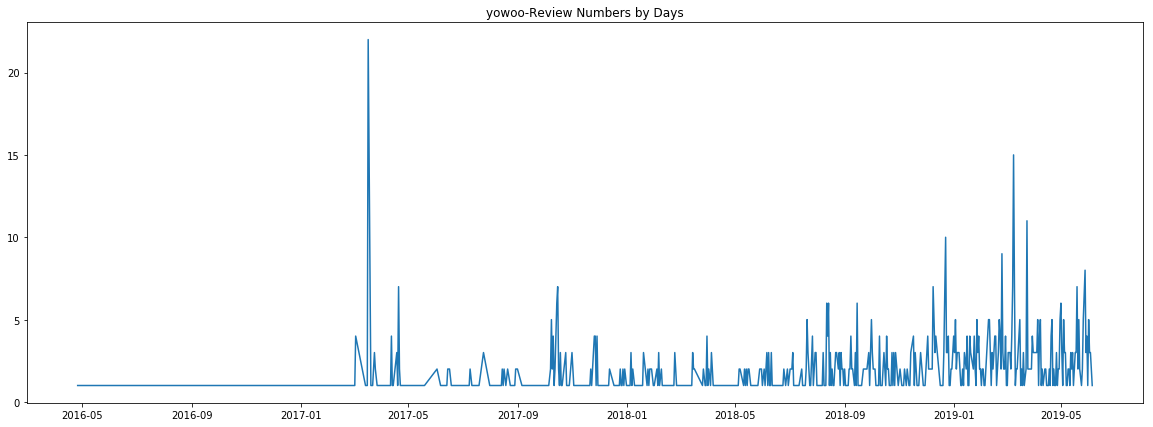

In [4]:
#reviewquant1.size().plot(title = "Yo Woo - Review Numbers by Days")
plt.figure(figsize=(20,7))
plt.title("yowoo-Review Numbers by Days")
plt.plot(reviewquant1day.size())

In [5]:
reviewquant1mon = yowoo.groupby(by='YM')
reviewquant1mon.size()

YM
2016-04-01     1
2016-08-01     1
2016-09-01     2
2016-10-01     4
2016-11-01     2
2016-12-01     3
2017-01-01     2
2017-02-01     3
2017-03-01    39
2017-04-01    25
2017-05-01     4
2017-06-01    17
2017-07-01    12
2017-08-01    19
2017-09-01     7
2017-10-01    51
2017-11-01    32
2017-12-01    21
2018-01-01    27
2018-02-01    17
2018-03-01    24
2018-04-01    17
2018-05-01    27
2018-06-01    31
2018-07-01    45
2018-08-01    57
2018-09-01    43
2018-10-01    49
2018-11-01    33
2018-12-01    60
2019-01-01    73
2019-02-01    71
2019-03-01    95
2019-04-01    65
2019-05-01    85
2019-06-01    12
dtype: int64

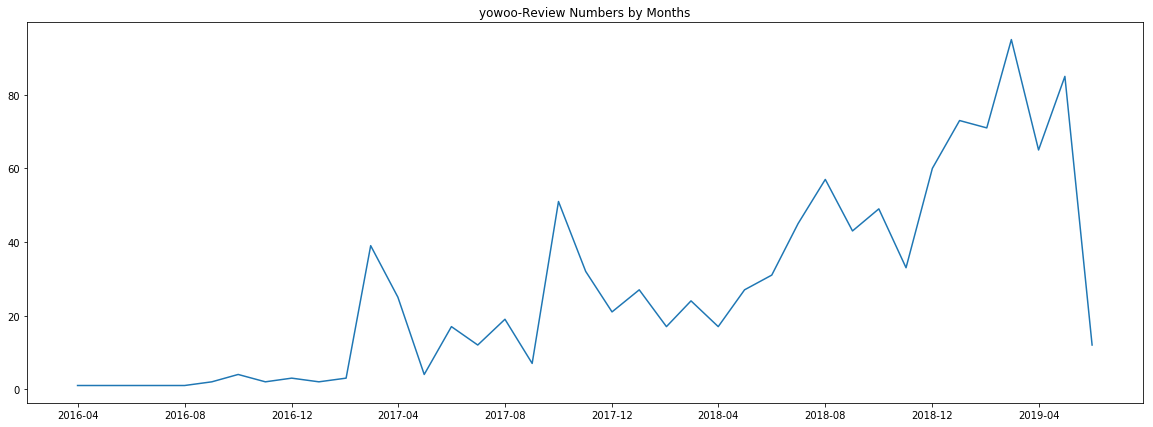

In [6]:
plt.figure(figsize=(20,7))
plt.title("yowoo-Review Numbers by Months")
plt.plot(reviewquant1mon.size())

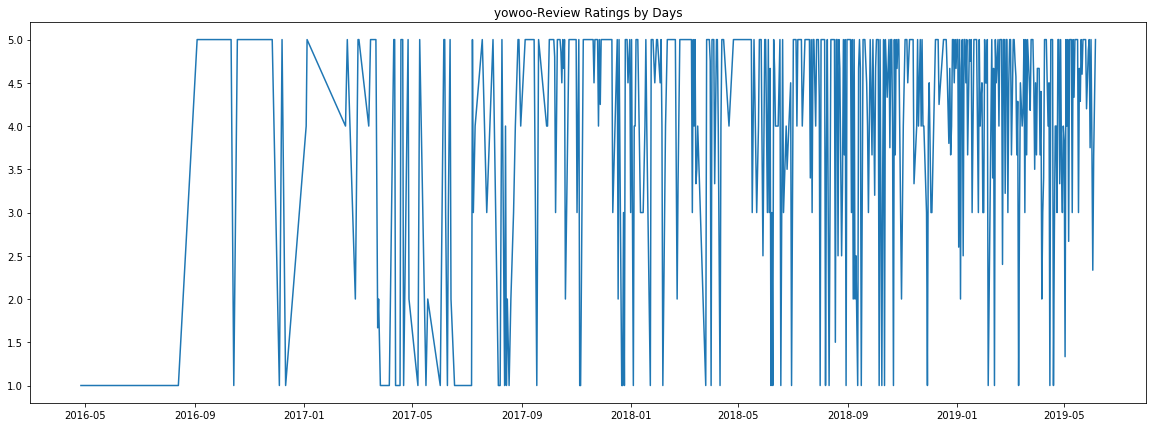

In [7]:
reviewrate1day = yowoo.groupby(by='Review Date')['Reviewer Ratings'].sum()
y1day = reviewrate1day/reviewquant1day.size()
plt.figure(figsize=(20,7))
plt.title("yowoo-Review Ratings by Days")
plt.plot(y1day)

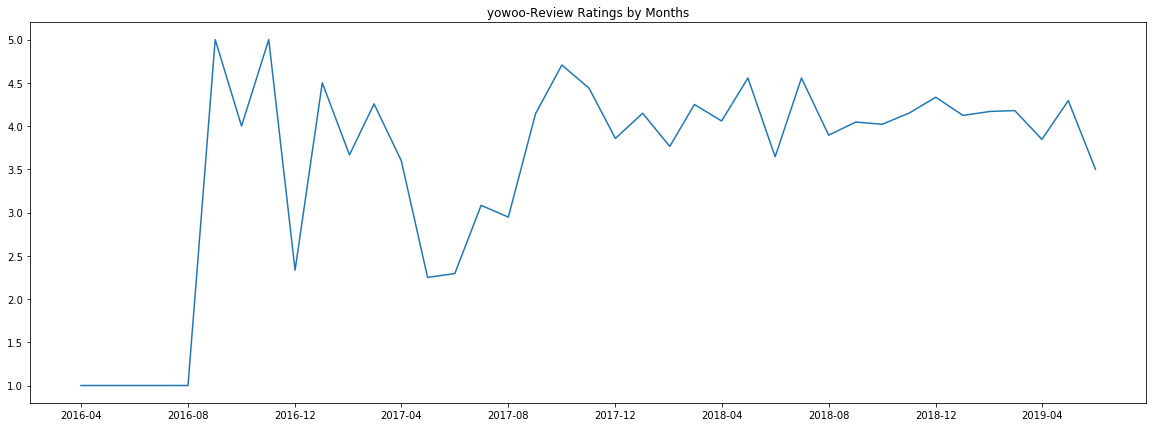

In [8]:
'''
df1 = yowoo[['Review Date', 'Reviewer Ratings']].copy()
df1['YM'] = df1['Review Date'].values.astype('datetime64[M]')
df1 = df1.groupby(['YM'], as_index = False).mean()

df1.head()

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)

ax.plot(df1['YM'], df1['Reviewer Ratings'])
ax.set_title('yowoo-Review Ratings by Months')
'''
reviewrate1mon = yowoo.groupby(by='YM')['Reviewer Ratings'].sum()
y1mon = reviewrate1mon/reviewquant1mon.size()
plt.figure(figsize=(20,7))
plt.title("yowoo-Review Ratings by Months")
plt.plot(y1mon)

In [9]:
df2 = yowoo[['Review Date', 'Reviewer Ratings', 'Review Likes']].copy()
df2['Review Likes'] += 1
df2['Weighted Ratings'] = df2['Reviewer Ratings'] * df2['Review Likes']
df2['YM'] = df2['Review Date'].values.astype('datetime64[M]')
df2 = df2.groupby(['YM'], as_index = False).sum()
df2['Weighted Final'] = df2['Weighted Ratings'] / df2['Review Likes']

df2.head()

,YM,Reviewer Ratings,Review Likes,Weighted Ratings,Weighted Final
0,2016-04-01,1,4,4,1.000000
1,2016-08-01,1,1,1,1.000000
2,2016-09-01,10,3,15,5.000000
3,2016-10-01,16,6,22,3.666667
4,2016-11-01,10,4,20,5.000000


Text(0.5,1,'yowoo-Weighted Review Ratings by Months')

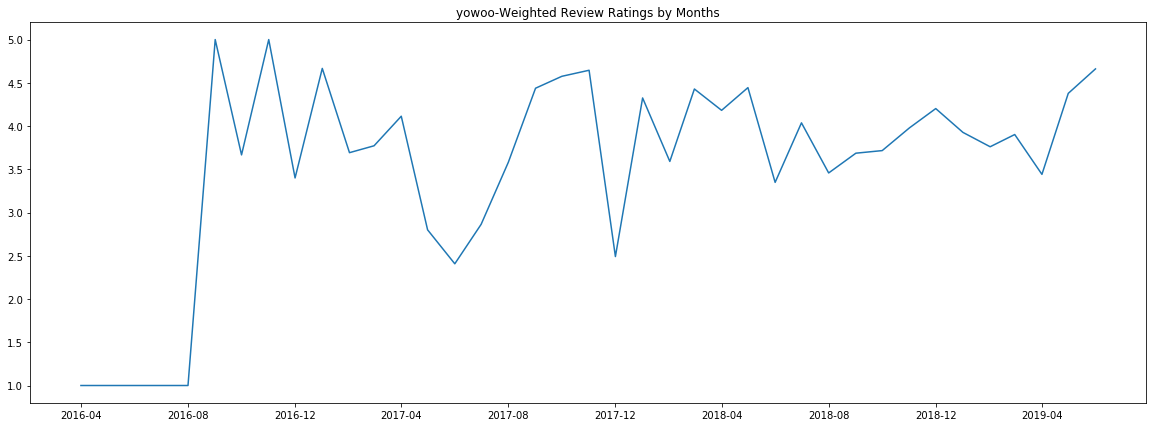

In [10]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)

ax.plot(df2['YM'], df2['Weighted Final'])
ax.set_title('yowoo-Weighted Review Ratings by Months')

In [11]:
from wordcloud import WordCloud
from collections import Counter
import jieba
jieba.set_dictionary("C:/Users/Tsai Jessica/Anaconda3/Lib/site-packages/jieba/dict.txt.big.txt")
stopwords = {}.fromkeys(["我","你們","甚麼","那個","有","的","很",",","，","！","!","100","了","?",
                         "也","要","都","？","就","。","是","不","在","吧","嗎","~","～",".",
                         "會","沒有","說","跟","後","人","但","用","才","不要","到","碼"])

In [12]:
yowoo_template = yowoo[["Reviewer Ratings", "Review Body"]].copy()
yowoo1 = yowoo_template[yowoo_template["Reviewer Ratings"] == 1]
yowoo2 = yowoo_template[yowoo_template["Reviewer Ratings"] == 2]
yowoo3 = yowoo_template[yowoo_template["Reviewer Ratings"] == 3]
yowoo4 = yowoo_template[yowoo_template["Reviewer Ratings"] == 4]
yowoo5 = yowoo_template[yowoo_template["Reviewer Ratings"] == 5]

yowoo_rating1 = yowoo1["Review Body"].values
yowoo_rating2 = yowoo2["Review Body"].values
yowoo_rating3 = yowoo3["Review Body"].values
yowoo_rating4 = yowoo4["Review Body"].values
yowoo_rating5 = yowoo5["Review Body"].values

In [13]:
yowoo_high_terms = []
yowoo_low_terms = []

for rating in yowoo_rating1:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            yowoo_low_terms.append(t)

for rating in yowoo_rating2:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            yowoo_low_terms.append(t)

for rating in yowoo_rating3:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            yowoo_low_terms.append(t)

for rating in yowoo_rating4:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            yowoo_high_terms.append(t)
        
for rating in yowoo_rating5:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            yowoo_high_terms.append(t)

Building prefix dict from C:\Users\Tsai Jessica\Anaconda3\Lib\site-packages\jieba\dict.txt.big.txt ...
Loading model from cache C:\Users\TSAIJE~1\AppData\Local\Temp\jieba.ucde4370ccb3e282c50f4514e287db922.cache
Loading model cost 1.203 seconds.
Prefix dict has been built succesfully.


Text(0.5,1,'1,2,3 Star')

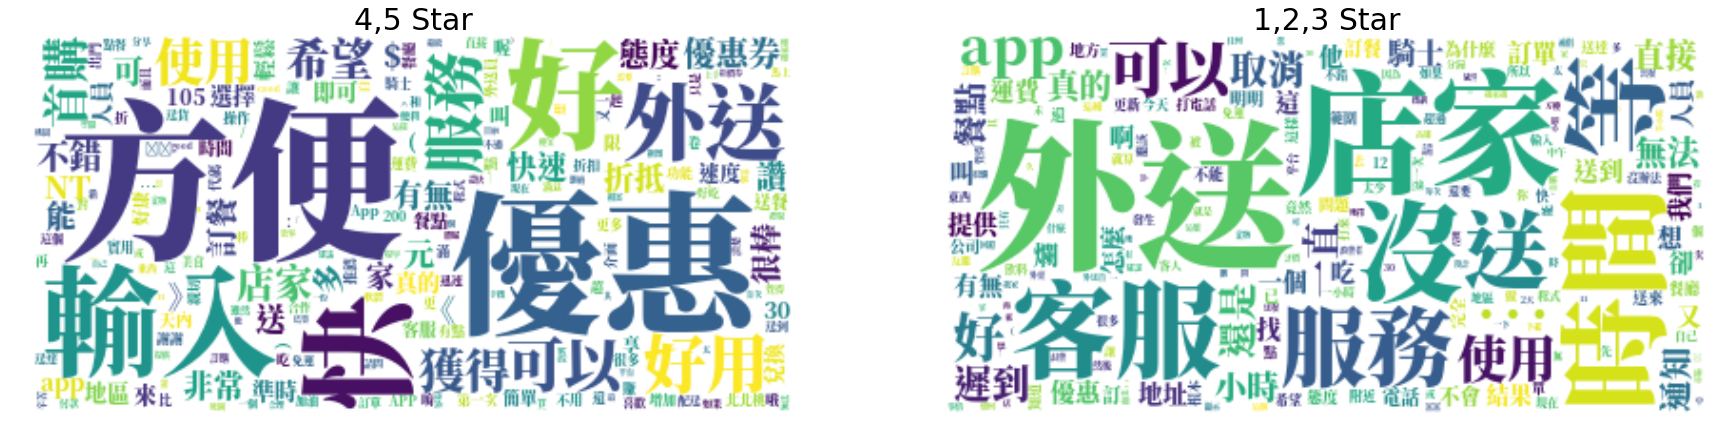

In [14]:
yowoo_high_wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf",background_color="white")
yowoo_high_wordcloud.generate_from_frequencies(frequencies=Counter(yowoo_high_terms))
yowoo_low_wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf",background_color="white")
yowoo_low_wordcloud.generate_from_frequencies(frequencies=Counter(yowoo_low_terms))


"""
plt.imshow(yowoo_high_wordcloud)
plt.axis("off")
plt.figure(figsize=(12,12), dpi = 700)
plt.show()
"""

fig = plt.figure(figsize = (30,10))

ax1 = fig.add_subplot(121)
ax1.imshow(yowoo_high_wordcloud, interpolation = "bilinear")
ax1.axis("off")
ax1.set_title("4,5 Star", size = 30)

ax2 = fig.add_subplot(122)
ax2.imshow(yowoo_low_wordcloud, interpolation = "bilinear")
ax2.axis("off")
ax2.set_title("1,2,3 Star", size = 30)

## foodomo

In [15]:
foodomo = pd.read_csv("C:\\Users\\Tsai Jessica\\NTU\\CSX4001_DataScience_Spring2019\\final\\2a.csv", low_memory=False, encoding = 'utf-8')
foodomo.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Review Body,Developer Reply,Review Likes
0,1,Anthea lee,2019年5月30日,5,輸入 u74X7049 邀請碼，可享免外送費喔～謝謝您,NaN,0
1,2,Xin Jia,2019年6月2日,5,優惠碼：v3605229 可享免運唷 ♥,NaN,0
2,3,flower,2019年6月1日,5,快快輸入我的邀請碼❤11575M39❤ 立即享有5次免費外送費^^🤗🤗🤗,NaN,12
3,4,琇琇,2019年5月28日,5,輸入 22353r79 優惠碼，立即享有5次免運唷~,NaN,15
4,5,廖宥瑋,2019年5月27日,5,輸入邀請碼 354W7479，有免運3次,NaN,0


In [16]:
foodomo['Review Date'] = pd.to_datetime(foodomo['Review Date'],format='%Y年%m月%d日')
foodomo['YM'] = foodomo['Review Date'].values.astype('datetime64[M]')
foodomo[['Reviewer Ratings', 'Review Likes']] = foodomo[['Reviewer Ratings', 'Review Likes']].astype(int)

In [17]:
reviewquant2day = foodomo.groupby(by='Review Date')
reviewquant2day.size()

Review Date
2016-08-13    1
2016-10-08    2
2017-01-06    1
2017-03-13    1
2017-03-15    2
2017-04-13    1
2017-04-16    1
2017-04-19    2
2017-04-21    1
2017-04-27    1
2017-05-09    1
2017-06-01    1
2017-06-05    1
2017-06-09    1
2017-07-10    1
2017-07-18    1
2017-07-20    2
2017-08-03    1
2017-08-18    1
2017-09-19    1
2017-12-15    1
2017-12-25    4
2018-03-19    2
2018-04-24    1
2018-05-08    1
2018-06-05    1
2018-06-11    1
2018-06-20    1
2018-06-30    1
2018-07-08    1
             ..
2019-02-16    1
2019-02-18    1
2019-02-20    1
2019-02-25    1
2019-03-02    1
2019-03-07    1
2019-03-09    2
2019-03-11    1
2019-03-14    1
2019-03-18    1
2019-03-20    1
2019-03-23    2
2019-04-01    3
2019-04-07    1
2019-04-08    2
2019-04-14    1
2019-04-20    3
2019-04-25    3
2019-04-28    1
2019-05-07    1
2019-05-10    1
2019-05-11    2
2019-05-20    1
2019-05-22    1
2019-05-26    1
2019-05-27    1
2019-05-28    1
2019-05-30    1
2019-06-01    1
2019-06-02    1
Length: 105,

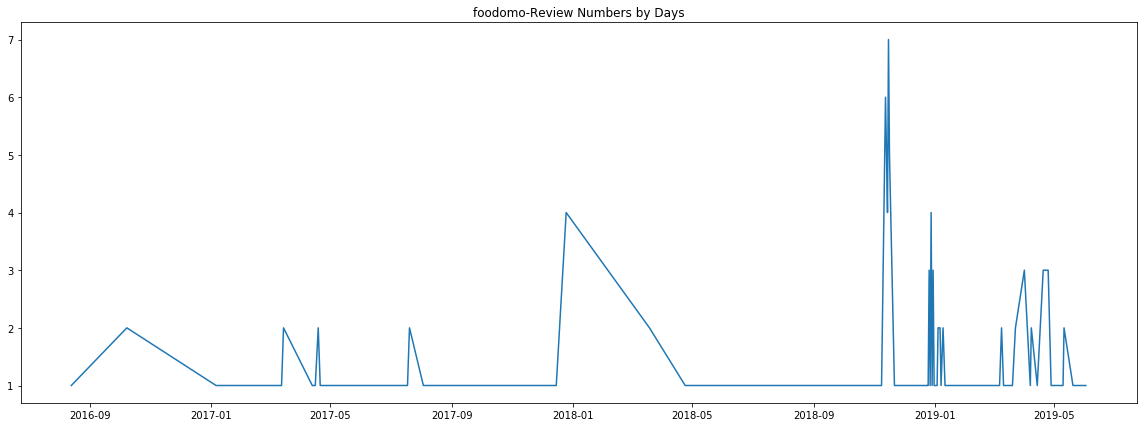

In [18]:
#reviewquant2.size().plot(title = "foodomo - Review Numbers by Days")
plt.figure(figsize=(20,7))
plt.title("foodomo-Review Numbers by Days")
plt.plot(reviewquant2day.size())

In [19]:
reviewquant2mon = foodomo.groupby(by='YM')
reviewquant2mon.size()

YM
2016-08-01     1
2016-10-01     2
2017-01-01     1
2017-03-01     3
2017-04-01     6
2017-05-01     1
2017-06-01     3
2017-07-01     4
2017-08-01     2
2017-09-01     1
2017-12-01     5
2018-03-01     2
2018-04-01     1
2018-05-01     1
2018-06-01     4
2018-07-01     2
2018-08-01     4
2018-09-01     3
2018-10-01     2
2018-11-01    30
2018-12-01    19
2019-01-01    16
2019-02-01     6
2019-03-01    10
2019-04-01    14
2019-05-01    10
2019-06-01     2
dtype: int64

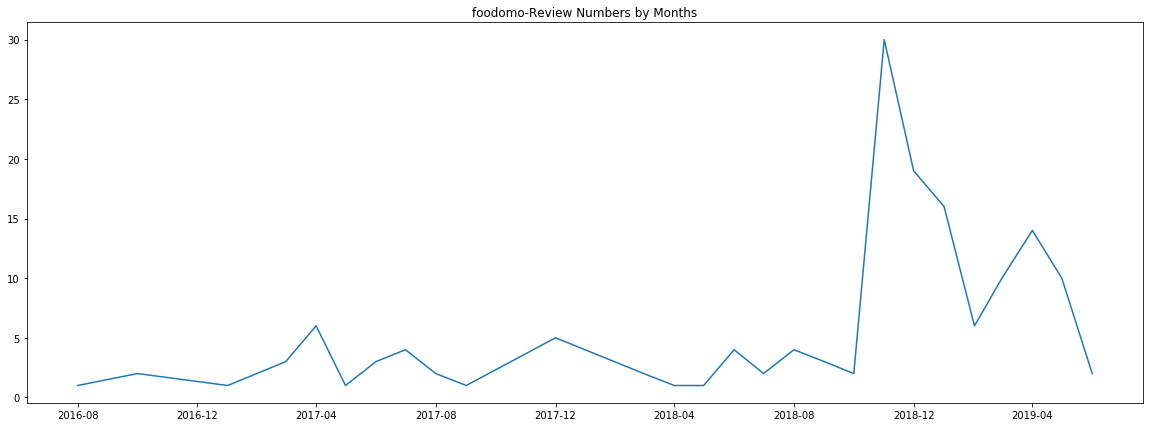

In [20]:
plt.figure(figsize=(20,7))
plt.title("foodomo-Review Numbers by Months")
plt.plot(reviewquant2mon.size())

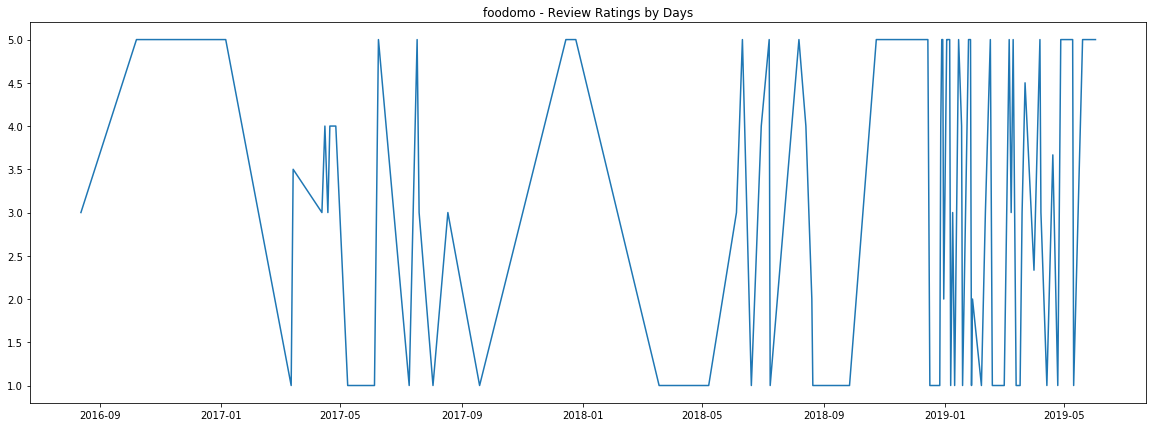

In [21]:
reviewrateday2 = foodomo.groupby(by='Review Date')['Reviewer Ratings'].sum()
y2day = reviewrateday2/reviewquant2day.size()
plt.figure(figsize=(20,7))
plt.title("foodomo - Review Ratings by Days")
plt.plot(y2day)

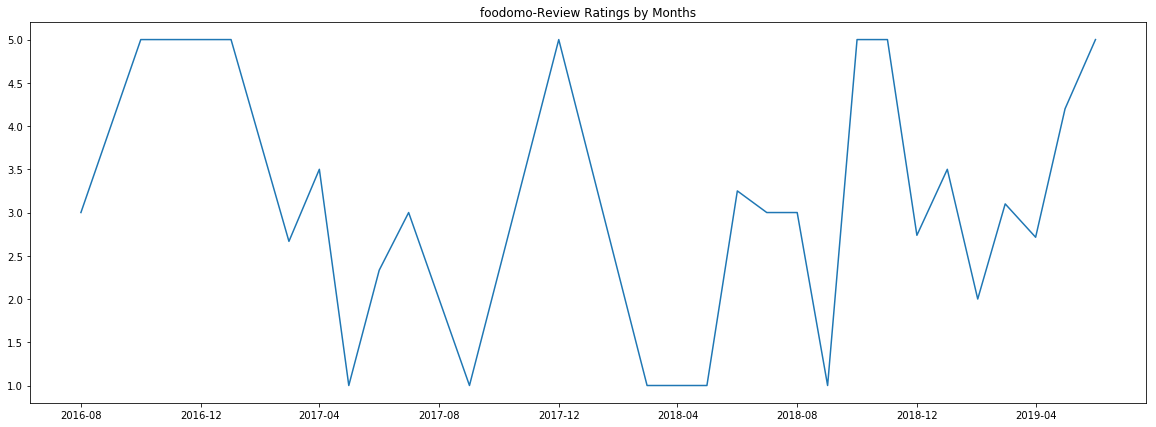

In [22]:
'''
df3 = foodomo[['Review Date', 'Reviewer Ratings']].copy()
df3['YM'] = df3['Review Date'].values.astype('datetime64[M]')
df3 = df3.groupby(['YM'], as_index = False).mean()
df3.head()

fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)

ax.plot(df3['YM'], df3['Reviewer Ratings'])
ax.set_title('foodomo-Review Ratings by Months')
'''
reviewrate2mon = foodomo.groupby(by='YM')['Reviewer Ratings'].sum()
y2mon = reviewrate2mon/reviewquant2mon.size()
plt.figure(figsize=(20,7))
plt.title("foodomo-Review Ratings by Months")
plt.plot(y2mon)

In [23]:
df4 = foodomo[['Review Date', 'Reviewer Ratings', 'Review Likes']].copy()
df4['Review Likes'] += 1
df4['Weighted Ratings'] = df4['Reviewer Ratings'] * df4['Review Likes']
df4['YM'] = df4['Review Date'].values.astype('datetime64[M]')
df4 = df4.groupby(['YM'], as_index = False).sum()
df4['Weighted Final'] = df4['Weighted Ratings'] / df4['Review Likes']

df4.head()

,YM,Reviewer Ratings,Review Likes,Weighted Ratings,Weighted Final
0,2016-08-01,3,3,9,3.000000
1,2016-10-01,10,14,70,5.000000
2,2017-01-01,5,6,30,5.000000
3,2017-03-01,8,6,12,2.000000
4,2017-04-01,21,14,53,3.785714


Text(0.5,1,'foodomo-Weighted Review Ratings by Months')

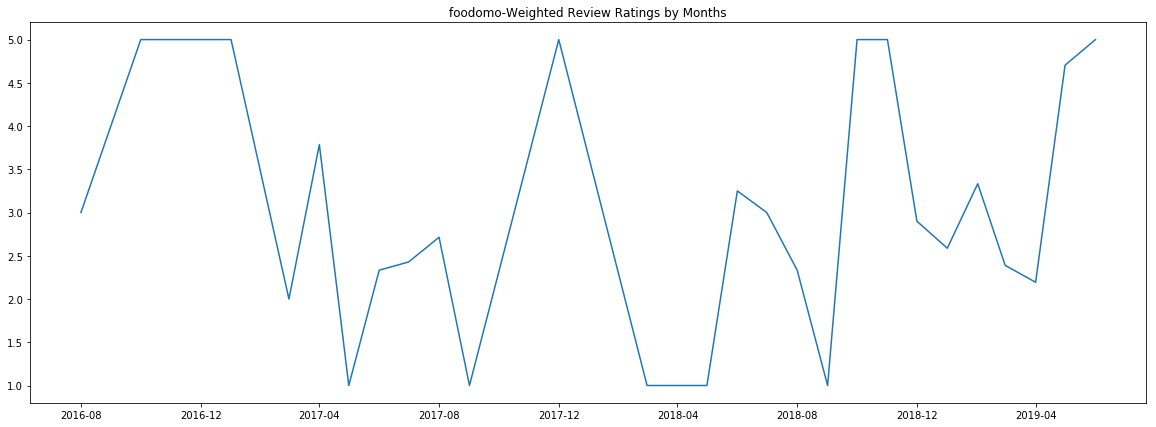

In [24]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111)

ax.plot(df4['YM'], df4['Weighted Final'])
ax.set_title('foodomo-Weighted Review Ratings by Months')

In [25]:
foodomo_template = foodomo[["Reviewer Ratings", "Review Body"]].copy()
foodomo1 = foodomo_template[foodomo_template["Reviewer Ratings"] == 1]
foodomo2 = foodomo_template[foodomo_template["Reviewer Ratings"] == 2]
foodomo3 = foodomo_template[foodomo_template["Reviewer Ratings"] == 3]
foodomo4 = foodomo_template[foodomo_template["Reviewer Ratings"] == 4]
foodomo5 = foodomo_template[foodomo_template["Reviewer Ratings"] == 5]

foodomo_rating1 = foodomo1["Review Body"].values
foodomo_rating2 = foodomo2["Review Body"].values
foodomo_rating3 = foodomo3["Review Body"].values
foodomo_rating4 = foodomo4["Review Body"].values
foodomo_rating5 = foodomo5["Review Body"].values

In [26]:
foodomo_high_terms = []
foodomo_low_terms = []

for rating in foodomo_rating1:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            foodomo_low_terms.append(t)

for rating in foodomo_rating2:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            foodomo_low_terms.append(t)

for rating in foodomo_rating3:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            foodomo_low_terms.append(t)

for rating in foodomo_rating4:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            foodomo_high_terms.append(t)
        
for rating in foodomo_rating5:   
    for t in jieba.cut(rating):
        if t not in stopwords:
            foodomo_high_terms.append(t)

Text(0.5,1,'1,2,3 Star')

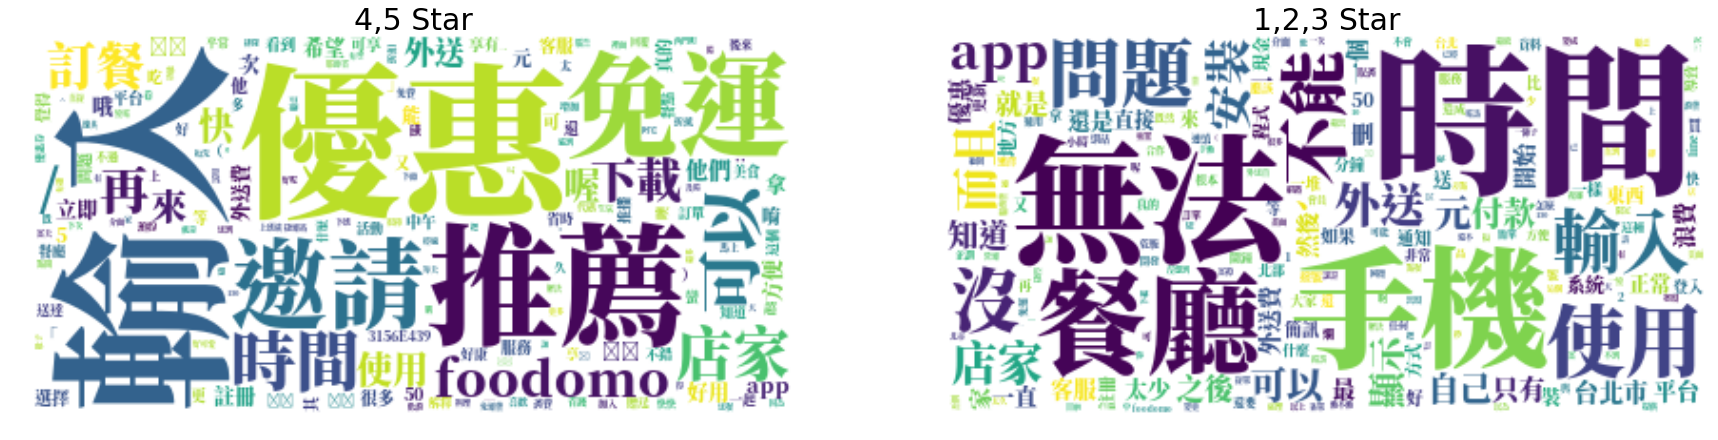

In [27]:
foodomo_high_wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf", background_color="white")
foodomo_high_wordcloud.generate_from_frequencies(frequencies=Counter(foodomo_high_terms))
foodomo_low_wordcloud = WordCloud(font_path="NotoSerifCJKtc-Black.otf",background_color="white") 
foodomo_low_wordcloud.generate_from_frequencies(frequencies=Counter(foodomo_low_terms))

fig = plt.figure(figsize = (30,10))

ax1 = fig.add_subplot(121)
ax1.imshow(foodomo_high_wordcloud, interpolation = "bilinear")
ax1.axis("off")
ax1.set_title("4,5 Star", size = 30)

ax2 = fig.add_subplot(122)
ax2.imshow(foodomo_low_wordcloud, interpolation = "bilinear")
ax2.axis("off")
ax2.set_title("1,2,3 Star", size = 30)